<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

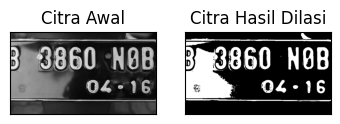

In [17]:

def dilasi_citra(F, w):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilatasi (SED)
    SED = np.ones((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD  # Pindahkan return di luar loop

# Membaca citra
img_d = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg', 0)
ret, thresh = cv.threshold(img_d, 125, 200, cv.THRESH_BINARY)
w = 2
imgD = dilasi_citra(thresh, w)

# Menampilkan gambar
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


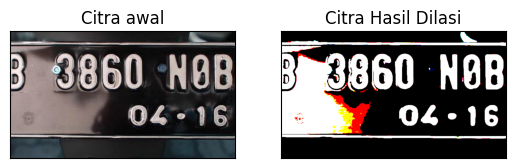

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg')
#img = cv.imread('morp.jpg'0)
ret, thresh = cv.threshold(img,127,255, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra awal')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]),plt.yticks([])
plt.show()


Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

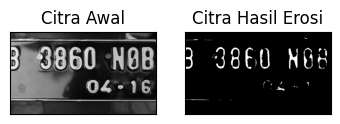

In [20]:
#Erosi tanpa lib

def erosi_citra(F,k):
  #size image
  m,n = F.shape

  #Generate erosi structure element (SE)
  SE= np.ones((k,k),dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n),dtype=np.uint8)

  #Proses erosi
  for i in range(constant,m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1,j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

img_e = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg',0)
ret1, thresh1 = cv.threshold(img_e,175,225,cv.THRESH_BINARY)
k=5
imgE= erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

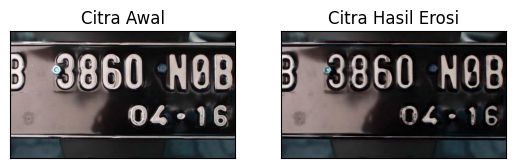

In [23]:
#EROSI LIBRARY
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion)
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

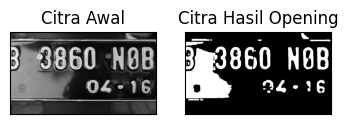

In [25]:
img_o= cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg',0) #
reto, thresho = cv.threshold(img_o, 127, 225, cv.THRESH_BINARY)
k=7

imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

Operasi Opening Menggunakan Library Morphology

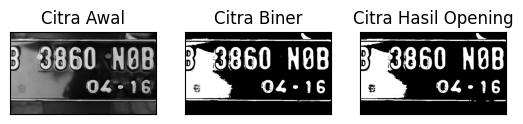

In [28]:
#Dengan Menggunakan Library
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg',0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

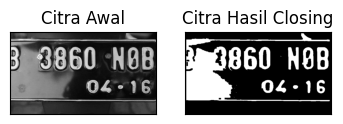

In [30]:
img_c= cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg',0) #
retc, threshc = cv.threshold(img_c, 127, 225,
cv.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

operasi closing dengan library morphology

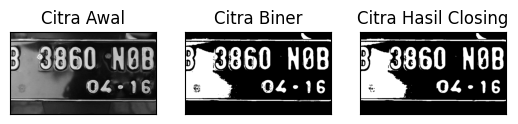

In [32]:
img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg',0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Cross 3


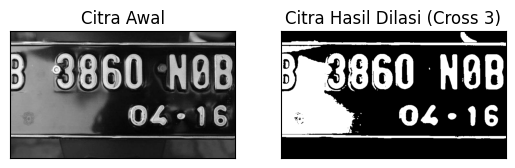

SED = Cross 5


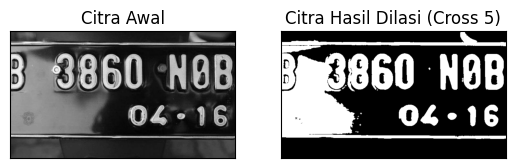

In [36]:
def dilasi_citra(F, SED):
    # Size image
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Calculate the constant for padding
    constant1 = (SED.shape[0] - 1) // 2

    # Proses dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Mengambil bagian citra sesuai dengan ukuran SED
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Erosi dengan SED Cross 3
print('SED = Cross 3')
img_d = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/plat.jpg', 0)
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
SED_cross3 = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)
imgD3 = dilasi_citra(thresh, SED_cross3)

plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD3, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SED Cross 5
print('SED = Cross 5')
SED_cross5 = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [1, 1, 1, 1, 1],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]], dtype=np.uint8)
imgD5 = dilasi_citra(thresh, SED_cross5)

plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD5, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 5)'), plt.xticks([]), plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

In [ ]:
#Dilasi circukar SED
 def dilasi_citra(F,w):
  p,q=F.shape

  imgD= np.zeros((p,q),dtype=np.uint8)

  #Generate SED
  SED= cv.getStructureElement(cv.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):

      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]

      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat
nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat
nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])